## Capstone --- Episode Transcripts loading and cleaning


#### Shuaichen Wu

## Introduction

The purpose of this notebook is to gather data in nested directories and get it into a form that is ready for EDA.

## Data Directories

There is one main directory --- Podcasts-transcripts.

In the directory, there are multi-level directories.

In the bottom directories, there are json files that contain transcripts in multiple dictionaries.

## Import Libraries 

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import time
import joblib
import json

First I take look at the cleaned metadata.

In [26]:
metadata = joblib.load('metadata.pkl')

In [27]:
metadata.head()

,show_description,publisher,episode_description,duration,show_filename_prefix,episode_filename_prefix
0,a 20-something blunt female takes on the world...,Katie Houle,on the first ever episode of kream in your kof...,12.700133,show_2NYtxEZyYelR6RMKmjfPLB,000A9sRBYdVh66csG2qEdj
1,inside the 18 is your source for all things go...,Inside the 18 GK Media,today’s episode is a sit down michael and omar...,43.616333,show_6vZRgUFTYwbAA79UNCADr4,001UfOruzkA3Bn1SPjcdfa
2,your favorite podcast for everything ! providi...,Arrowhead Live!,join us as we take a look at all current chief...,58.189200,show_5BvKEjaMSuvUsGROGi2S7s,001i89SvIQgDuuyC53hfBm
3,get ready to whiten those knuckles and hold fa...,They Had to Go Out,former boatswain’s mate dan shirey talks pitch...,58.469783,show_0g0gZz74AKcS1MpJJ1T01N,002UpWk6zCgvHSAzmvohRG
4,welcome to the official the willing equine pod...,The Willing Equine,how are relationships made? what is trust buil...,23.832183,show_53MmIvDLkuBwkOEmPtCmeJ,003wT7YPtDMpA8r62joD9M


Second, I take look at the json files paths.

In [4]:
#load all files inside the spotify podcasts transcripts directory.
rootdir = 'spotify-podcasts-2020/podcasts-transcripts'
paths = []
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        path = os.path.join(subdir, file)
        if '.json' in path:
            paths.append(path)           

In [5]:
#check if we get the all json_paths
len(paths)

105360

In [6]:
paths[0]

'spotify-podcasts-2020/podcasts-transcripts/0/R/show_0rEzHBbqtuqgP4zEmKzqIH/1vQEPaGpic4rvaVGf3B9P6.json'

Now I know the dataset has 105,360 podcast episode transcripts. I already cleaned the metadata, I only need 32,627 transcripts from it.

So I need to construct json_paths from the metadata to get the corresponding transcripts.

Json files path have four parts:

1. the static prefix: 'spotify-podcasts-2020/podcasts-transcripts/'

2. the first directory which refers to the 6th show_filename_prefix letter

3. the second directory which refers to the 7th show_filename_prefix letter

4. the third directory which refers to the whole show_filename_prefix 

5. the bottom file name which refers to the episode_filename_prefix with '.json'

In [7]:
#define a function that constructs json_path from the metadata series
def json_path(Series):
    path='spotify-podcasts-2020/podcasts-transcripts/'
    path += f'{Series[4][5]}/{Series[4][6]}/{Series[4]}/{Series[5]}.json'
    return path

In [8]:
# use for loop to apply json path function on metadata
json_paths=[]
for i in range(metadata.shape[0]):
    path = json_path(metadata.loc[i])
    json_paths.append(path)

In [9]:
len(json_paths)

32627

In [8]:
#take a look at the first path
json_paths[0]

'spotify-podcasts-2020/podcasts-transcripts/2/N/show_2NYtxEZyYelR6RMKmjfPLB/000A9sRBYdVh66csG2qEdj.json'

Now I need to read all the json files. When I tried to read all the json files at once, my kernel kept being automatically turned off due to costing too much computation power.

So I decide to split the json paths into three chunks. 


In [11]:
chunk = 10000

In [15]:
#load the json files from the first chunk
start = time.time()
json_files = []
for k, path in enumerate(json_paths[:chunk]):
    f = open(path) 
    data = json.load(f)
    json_files.append(data)
    f.close()
    print(k,end='\r')
end = time.time()
print(f'duration for loading chunk1 is {end-start}')

duration for loading chunk1 is 727.0166931152344


Because of the unstable of kernel, and the size of json_files, I decided to extract the transcripts from the json files before loading the sencond chunk.

First, check the structure of the json files.

In [17]:
#read in the first json file
json_files[0]

{'results': [{'alternatives': [{'transcript': "Hello. Hello. Hello everyone. This is Katie and we are here together on our first ever episode of cream in your coffee. Thank you so much guys for humoring me on this podcast Journey. It's been a huge goal of mine for the past few years. I finally just growing a pair and jumping right into it and seeing how it goes. So, thank you again for bearing with me here.",
     'confidence': 0.8527000546455383,
     'words': [{'startTime': '1.900s', 'endTime': '2.600s', 'word': 'Hello.'},
      {'startTime': '2.600s', 'endTime': '3s', 'word': 'Hello.'},
      {'startTime': '3s', 'endTime': '3.400s', 'word': 'Hello'},
      {'startTime': '3.400s', 'endTime': '4.500s', 'word': 'everyone.'},
      {'startTime': '4.500s', 'endTime': '4.800s', 'word': 'This'},
      {'startTime': '4.800s', 'endTime': '5.100s', 'word': 'is'},
      {'startTime': '5.100s', 'endTime': '5.700s', 'word': 'Katie'},
      {'startTime': '5.700s', 'endTime': '6s', 'word': 'and'},

I found out all the transcripts are related by the keys: 'alternatives' and  'transcript'.

In [18]:
#get the transcripts for each episode in chunk 1.
transcripts = [] 
for j, json in enumerate(json_files):
    transcript = ''
    for i in range(len(json['results'])):
        if 'transcript' in json['results'][i]['alternatives'][0]:
            transcript += f"{json['results'][i]['alternatives'][0]['transcript']} "
    transcripts.append(transcript)

In [19]:
len(transcripts)

10000

In [20]:
joblib.dump(transcripts,'transcripts_checkpoint1.pkl')

['transcripts_checkpoint1.pkl']

In [11]:
transcripts=joblib.load('transcripts_checkpoint1.pkl')

Now I need to load the second chunk.

In [10]:
#load the json files from the second chunk
json_files_2=[] #give different list name
start = time.time()
for k, path in enumerate(json_paths[chunk:chunk*2]):
    f = open(path) 
    data = json.load(f)
    json_files_2.append(data)
    f.close()
    print(k,end='\r')
end = time.time()
print(f'duration for loading chunk1 is {end-start}')

duration for loading chunk1 is 733.01735496521


In [12]:
for j, json_ in enumerate(json_files_2):
    transcript = ''
    for i in range(len(json_['results'])):
        if 'transcript' in json_['results'][i]['alternatives'][0]:
            transcript += f"{json_['results'][i]['alternatives'][0]['transcript']} "
    transcripts.append(transcript)

In [13]:
len(transcripts)

20000

In [14]:
joblib.dump(transcripts,'transcripts_checkpoint2.pkl')

['transcripts_checkpoint2.pkl']

In [14]:
transcripts=joblib.load('transcripts_checkpoint2.pkl')

Now I can load the json files from the third chunk.

In [12]:
#load the json files from the second chunk
json_files_3=[] #give different list name
start = time.time()
for k, path in enumerate(json_paths[chunk*2:]):
    f = open(path) 
    data = json.load(f)
    json_files_3.append(data)
    f.close()
    print(k,end='\r')
end = time.time()
print(f'duration for loading chunk1 is {end-start}')

duration for loading chunk1 is 1049.7601900100708


In [15]:
for j, json_ in enumerate(json_files_3):
    transcript = ''
    for i in range(len(json_['results'])):
        if 'transcript' in json_['results'][i]['alternatives'][0]:
            transcript += f"{json_['results'][i]['alternatives'][0]['transcript']} "
    transcripts.append(transcript)

In [16]:
joblib.dump(transcripts,'transcripts_checkpoint3.pkl')

['transcripts_checkpoint3.pkl']

In [30]:
transcripts = joblib.load('transcripts_checkpoint3.pkl')

Now I can concatenate the transcripts and metadata.

In [31]:
train = pd.DataFrame({'transcript':np.array(transcripts), 'summary':metadata['episode_description']})

In [32]:
train.head()

,transcript,summary
0,Hello. Hello. Hello everyone. This is Katie an...,on the first ever episode of kream in your kof...
1,Welcome to inside the 18. Today's episode is t...,today’s episode is a sit down michael and omar...
2,Hey cheese fans before we get started. I wante...,join us as we take a look at all current chief...
3,Get ready to whiten those Knuckles and hold fa...,former boatswain’s mate dan shirey talks pitch...
4,"Hey everyone, welcome to another episode of th...",how are relationships made? what is trust buil...


In [33]:
train.shape

(32627, 2)

In [34]:
joblib.dump(train,'train.pkl')

['train.pkl']

In [2]:
train = joblib.load('train.pkl')

Now I can check the quality of the transcripts.

In [35]:
#check if there is nan value
train['transcript'].isna().sum()

0

There are no nan values.

In [36]:
#check if there is duplicated value
train['transcript'].duplicated().sum()

1

Interestingly, there is one duplicated value, I need take a look.

In [37]:
train[train['transcript'].duplicated(keep=False)]

,transcript,summary
1505,It needs a drink plenty of fluids at least fou...,don’t just sit back and assume that following ...
31571,It needs a drink plenty of fluids at least fou...,don't balk at super-challenging workouts. they...


In [38]:
train['transcript'][1505]

"It needs a drink plenty of fluids at least four point five plays out uploading images or more if it is very hot or they are Physically Active. What are the best source of course and we can use tap or mineral water sprinkling almost bringing plain or flavored free juice.  Just these sultry links milk and drinks can be okay. We need to take a little flutes in our system to neutralize our system. We could we could take we could take at least 0.5 liters of fluid in Ed is vital a couple of people don't like Cricket. Even if you don't want to drink water you drink team, you could drink soft drinks milk. You could take fruit juice sprinkled or  I'll sprinkle plead mineral water anything you watch the it seeps am giving you today is all meats and a healthy body weight. Wow, when we're now you talking about how to live in a little people Caesar living as but the with the Maxi of your body your your physical appearance appearance. And the rest of the the rich wait for each of us depends on the 

In [39]:
train['summary'][1505]

'don’t just sit back and assume that following the preset targets will lead you to glory. adjust the steps, active minutes and calorie targets regularly to build on your progress, or make them more realistic if you never get close and have started to ignore them. if you don’t engage with your fitness tech, you’ll quickly discard it.'

In [40]:
train['transcript'][31571]

"It needs a drink plenty of fluids at least four point five plays out uploading images or more if it is very hot or they are Physically Active. What are the best source of course and we can use tap or mineral water sprinkling almost bringing plain or flavored free juice.  Just these sultry links milk and drinks can be okay. We need to take a little flutes in our system to neutralize our system. We could we could take we could take at least 0.5 liters of fluid in Ed is vital a couple of people don't like Cricket. Even if you don't want to drink water you drink team, you could drink soft drinks milk. You could take fruit juice sprinkled or  I'll sprinkle plead mineral water anything you watch the it seeps am giving you today is all meats and a healthy body weight. Wow, when we're now you talking about how to live in a little people Caesar living as but the with the Maxi of your body your your physical appearance appearance. And the rest of the the rich wait for each of us depends on the 

In [41]:
train['summary'][31571]

'don\'t balk at super-challenging workouts. they\'re tough for a reason: they work. when ramsay asked actor cheyenne jackson which exercise he dreaded most, he said burpees. "so i put him on a 30-minute burpee routine, five times a week," ramsay says. "in 6 weeks, he was a different man."'

Both seem to come from a podcast show that encourages people to exercise. I decide to drop the second one since the first summary looks cleaner.

In [52]:
train.drop(train[train['transcript'].duplicated(keep='last')].index,axis=0,inplace=True) #drop the index 31571

In [53]:
#verify the change I did
train['transcript'].duplicated().sum()

0

In [57]:
#reset the index for train dataframe
train.reset_index(drop=True,inplace=True)

Now I can do some data processing on the transcripts.

First, let me print out the first 5 transcripts to get a feeling of what I need to do.

In [58]:
for i in range(5):
    print(train['transcript'][i])

Hello. Hello. Hello everyone. This is Katie and we are here together on our first ever episode of cream in your coffee. Thank you so much guys for humoring me on this podcast Journey. It's been a huge goal of mine for the past few years. I finally just growing a pair and jumping right into it and seeing how it goes. So, thank you again for bearing with me here.  Alrighty guys, so I figured for the first episode why not jump into a topic that is so exciting for pretty much everybody out there just around the corner and seven or eight days. We have the wonderful Christmas and I'm so excited Christmas is a great time of year for me. I just love the spirit of happiness and joy and the giving spirit. I love every single part of it and I hope that you guys are excited for it to obviously it would definitely  I say that most people are I find most excited about receiving gifts around Christmas time. I'm definitely the opposite I get really really awkward when someone gives me a gift but I get

Compared to the summaries, transcripts look pretty clean.

I can do a contraction mapping, change we've to we have.

I can do lower case for model building.


I got the contraction map from the blog[1].

In [59]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}


In [60]:
def transcripts_cleaner(text):
    text=text.lower()
    text = " ".join([contraction_mapping[t] if t in contraction_mapping else t for t in text.split(" ")])

    return text

In [61]:
train['transcript']=train['transcript'].apply(transcripts_cleaner)

In [62]:
train['transcript'][0]

"hello. hello. hello everyone. this is katie and we are here together on our first ever episode of cream in your coffee. thank you so much guys for humoring me on this podcast journey. it is been a huge goal of mine for the past few years. i finally just growing a pair and jumping right into it and seeing how it goes. so, thank you again for bearing with me here.  alrighty guys, so i figured for the first episode why not jump into a topic that is so exciting for pretty much everybody out there just around the corner and seven or eight days. we have the wonderful christmas and i am so excited christmas is a great time of year for me. i just love the spirit of happiness and joy and the giving spirit. i love every single part of it and i hope that you guys are excited for it to obviously it would definitely  i say that most people are i find most excited about receiving gifts around christmas time. i am definitely the opposite i get really really awkward when someone gives me a gift but i

From the above part, it seems some summaries still need some cleaning. Let me choose 5 random summaries.

In [63]:
random_choice=np.random.randint(0,train.shape[0],5)

In [64]:
for i in random_choice:
    print(train['summary'][i])
    print()

it was so fun catching up with dr hebah hefzy heb samir here on our 11th episode of the mdrt podcast. hebah is a vascular neurologist in michigan, single mom of 3 gorgeous kiddos and an avid marathoner! she has qualified for the boston marathon 4 times, most recently at the 2019 chicago marathon with a shiny new pr. we talk all things marathon training as a single mom, doctor and woman of faith, and how it feels to not necessarily blend in all the time and what unites all of us. thank you hebah for an awesome conversation and please enjoy!

on today's show, jacob, nick, and maggie discuss how the packers' defense matches up with the chargers' offense, while also reviewing how mike pettine and the team will need to adjust to the chargers' change at offensive coordinator. plus they give out their new weekly award, and conclude the show with a very special interview that jacob recorded with former chargers' linebacker kyle emanuel. it's a jam-packed show that you won't want to miss!

neil

There are some things I can do for summaries.

I can remove speical characters,  like * · • # [ ] - and information inside it.

I can use the contraction map on summaries.

I can remove links that begin with http://

I can remove any sentences that begin with /

I can remove sentences with 'sponsor','please click','click here','click the link','ig:','email:'

In [65]:
def summary_cleaner(text):
    text = re.sub(r'[*·•#\"]', '', text) #remove the * · • # "
    text = re.sub(r'\.\.+', ' ', text) #remove three points
    text = re.sub(r'\[[a-z]*\]', ' ', text) #remove [,] and the content inside it
    
#     #apply contraction map
    text = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in text.split(" ")])
    
    text = re.sub(r'[\sa-z\:]*http://[a-z./-]*', ' ', text) #remove links and potential information before it
    text = re.sub(r'\s/[a-z0-9\-?=]*', ' ', text) #remove string like /smapler
    
    text = re.sub(r'[a-z0-9\s]*ig:[a-z0-9\s]*',' ', text)
    text = re.sub(r'[a-z0-9\s]*instagram:[a-z0-9\s]*',' ', text)
    text = re.sub(r'[a-z0-9\s]*email:[a-z0-9\s]*',' ', text)
    text = re.sub(r'[a-z0-9\s]*plase\sclick[a-z0-9\s]*',' ', text)
    text = re.sub(r'[a-z0-9\s]*click\shere[a-z0-9\s]*',' ', text)
    text = re.sub(r'[a-z0-9\s]*click\sthe\slink[a-z0-9\s]*',' ', text)
    text = re.sub(r'[a-z0-9\s]*sponsor[a-z0-9\s]*',' ', text) #remove sentence with 'sponsor','please click','click here','ig:','email:'

    text = re.sub(r'\s[.!?]\s','',text) # get rid of single dot,question mark,and exclamation mark
    
    text = re.sub(r'\s\s+', ' ', text) # get rid more than one space
    text = text.strip() #get rid of the space in the end of sentences.
    
    return text

In [66]:
train['summary'] = train['summary'].apply(summary_cleaner)

In [144]:
train.shape

(32626, 2)

After the second cleaning, there are some summaries that may turn to be zero words or under the criteria of the length requirement of between 20 to 750 words.

In [145]:
len_summary=train['summary'].apply(lambda x:len(x.split())) 

In [150]:
qulified_summary = np.where((len_summary>20) & (len_summary <750))

In [152]:
qulified_summary[0].shape

(32354,)

Now I have 32,354 rows.

In [155]:
train=train.loc[qulified_summary]

In [157]:
train.reset_index(drop=True,inplace=True)

In [158]:
joblib.dump(train,'train.pkl')

['train.pkl']

In [ ]:
train.to_csv('train.csv')

## Some EDA on summary and transcripts

### Check the sentence count of summaries and transcripts

In [161]:
from nltk.tokenize import sent_tokenize

In [162]:
num_sentence_summary =[]
num_sentence_transcript=[]

In [163]:
for summary in train['summary']:
    sentences = sent_tokenize(summary)
    num = len(sentences)
    num_sentence_summary.append(num)

In [164]:
for transcript in train['transcript']:
    sentences = sent_tokenize(transcript)
    num = len(sentences)
    num_sentence_transcript.append(num)

Transcripts Sentence count mean is 408, Transcripts Sentence count median is 364
Summaries Sentence count mean is 5, Summaries Sentence count median is 4


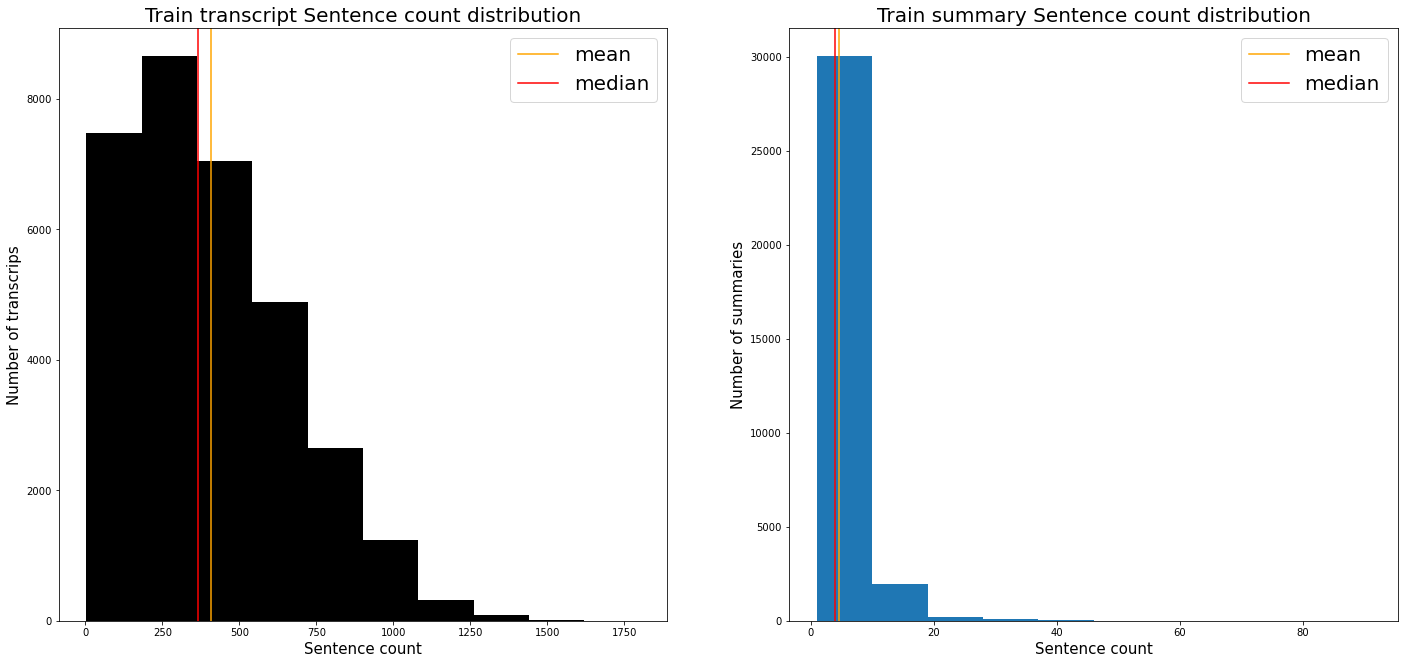

In [169]:
plt.subplots(1,2,figsize=(24,24))

plt.subplot(2,2,1)
plt.hist(num_sentence_transcript,color = 'black')
plt.axvline(np.mean(num_sentence_transcript),label='mean',c='orange')
plt.axvline(np.median(num_sentence_transcript),label='median',c='red')
plt.xlabel('Sentence count',size=15)
plt.ylabel('Number of transcrips',size=15)
plt.title('Train transcript Sentence count distribution',size=20)
plt.legend(fontsize=20)

plt.subplot(2,2,2)
plt.hist(num_sentence_summary)
plt.axvline(np.mean(num_sentence_summary),label='mean',color='orange')
plt.axvline(np.median(num_sentence_summary),label='median',c='red')
plt.xlabel('Sentence count',size=15)
plt.ylabel('Number of summaries',size=15)
plt.title('Train summary Sentence count distribution',size=20)
plt.legend(fontsize=20)

print(f'Transcripts Sentence count mean is {round(np.mean(num_sentence_transcript))}, Transcripts Sentence count median is {round(np.median(num_sentence_transcript))}')
print(f'Summaries Sentence count mean is {round(np.mean(num_sentence_summary))}, Summaries Sentence count median is {round(np.median(num_sentence_summary))}')

From the diagram above, I know most summaries have less than 10 sentences.

For transcripts, most transcripts have from 250 to 500 sentences.



In [173]:
print(f' the standard deviation of summaries sentence count is {round(np.std(num_sentence_summary))},\n \
the standard deviation of transcripts sentence count is {round(np.std(num_sentence_transcript))}.')

 the standard deviation of summaries sentence count is 4,
 the standard deviation of transcripts sentence count is 264.


I know for cental transcripts, the number of sentences are between 
408 ± 264.

For central summaries, the number of sentences are between
5 ± 4.

In [214]:
pd.Series(num_sentence_transcript).describe()

count    32354.000000
mean       407.585523
std        264.192623
min          3.000000
25%        196.000000
50%        364.000000
75%        575.000000
max       1800.000000
dtype: float64

In [215]:
pd.Series(num_sentence_summary).describe()

count    32354.000000
mean         4.576497
std          3.769669
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         91.000000
dtype: float64

The minimum sentences for a transcript is 3 sentences.
For transcripts, more than 75% have more than 196 sentences.

The minimum number of sentences for a summary is 1.

### Check the word counts of summaries and transcripts

In [70]:
#use empty list to store the length 
len_summary=[]
len_transcript =[]

In [72]:
for summary in train['summary']:
    len_summary.append(len(summary.split()))

In [73]:
for transcript in train['transcript']:
    len_transcript.append(len(transcript.split()))

Transcripts word count mean is 7161, Transcripts word count median is 6756
Summaries word count mean is 82, Summaries word count median is 63


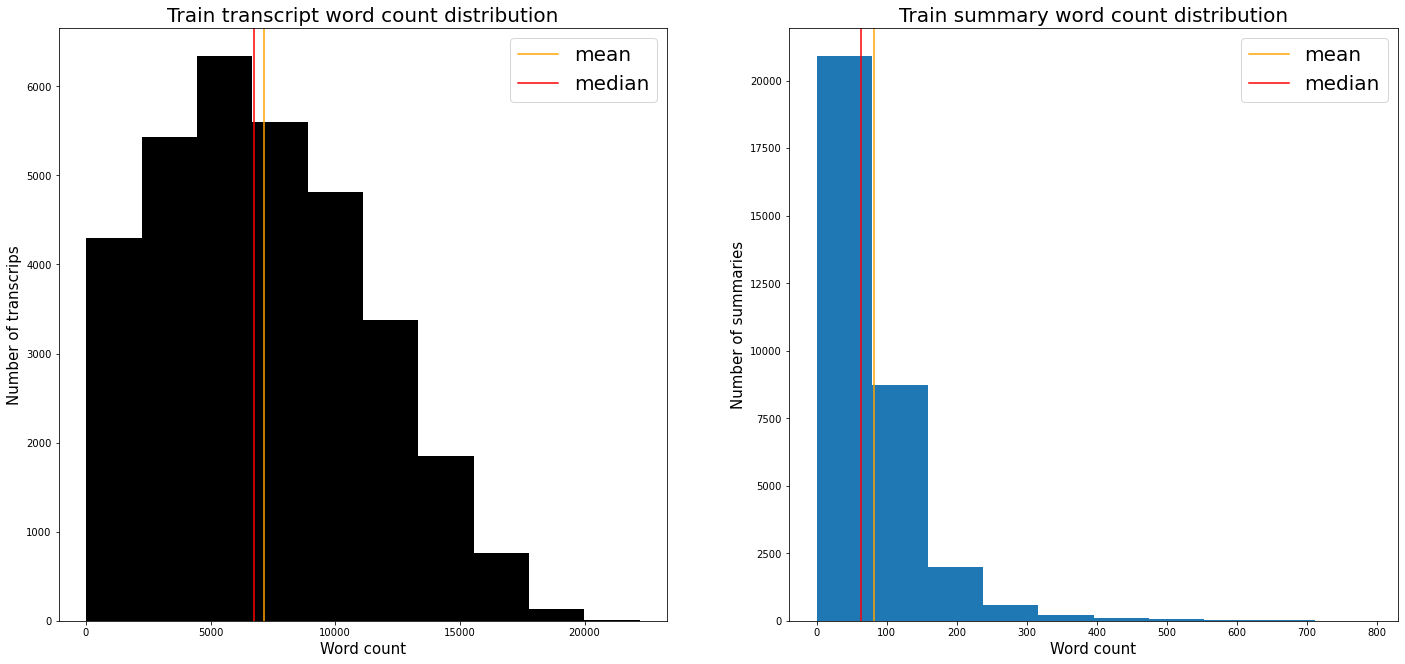

In [78]:
plt.subplots(1,2,figsize=(24,24))

plt.subplot(2,2,1)
plt.hist(len_transcript,color = 'black')
plt.axvline(np.mean(len_transcript),label='mean',c='orange')
plt.axvline(np.median(len_transcript),label='median',c='red')
plt.xlabel('Word count',size=15)
plt.ylabel('Number of transcrips',size=15)
plt.title('Train transcript word count distribution',size=20)
plt.legend(fontsize=20)

plt.subplot(2,2,2)
plt.hist(len_summary)
plt.axvline(np.mean(len_summary),label='mean',color='orange')
plt.axvline(np.median(len_summary),label='median',c='red')
plt.xlabel('Word count',size=15)
plt.ylabel('Number of summaries',size=15)
plt.title('Train summary word count distribution',size=20)
plt.legend(fontsize=20)

print(f'Transcripts word count mean is {round(np.mean(len_transcript))}, Transcripts word count median is {round(np.median(len_transcript))}')
print(f'Summaries word count mean is {round(np.mean(len_summary))}, Summaries word count median is {round(np.median(len_summary))}')

From the diagram above, I know transcripts have from 0 to 20,000 words.
The averge word count of transcripts is 7162 words, and the median is 6756 words.

Also I know summaries have from 0 to 200 words.
The average word count of summaries is 82 words, and the median is 63 words.

In [174]:
print(f' the standard deviation of summaries word count is {round(np.std(len_summary))},\n \
\n \
the standard deviation of transcripts is {round(np.std(len_transcript))}.')


 the standard deviation of summaries word count is 66,
 
 the standard deviation of transcripts is 4124.


The cental transcripts have 7162 ± 4124 words.

The central summaries have 82 ± 66 words.

### Number of Word Tokens
Now I can check how many word tokens are in summaries and transcripts.

As a first step, I need to remove stop words first. 

If the stop words are not removed, the most frequent words would just be stop words.

In [109]:
from nltk.corpus import stopwords   
stop_words = set(stopwords.words('english')) 
def remove_stop_words(text):
    tokens = [w for w in text.split() if not w in stop_words]
    return " ".join(tokens).strip()

In [110]:
#remove stop words for summaries
summary_no_stopwords = train['summary'].apply(remove_stop_words)

In [111]:
#remove stop words for transcripts
transcript_no_stopwords = train['transcript'].apply(remove_stop_words)

Now I can use tokenizer from keras and apply it on the text.

In [112]:
#import the library I need
from tensorflow.keras.preprocessing.text import Tokenizer 

In [113]:
#initiate the tokenizer
summary_tokenizer = Tokenizer()

In [114]:
#fit to the summary
summary_tokenizer.fit_on_texts(summary_no_stopwords )

In [115]:
#check the number of tokens
summary_index_word = summary_tokenizer.index_word
print(f'The number of tokens for summaries is {len(summary_index_word)}.')

The number of tokens for summaries is 95932.


In [116]:
#check the word frequency in summaries
summary_word_frequency = pd.DataFrame(data=summary_tokenizer.word_counts.items(),columns=['word in summary','count'])
summary_word_frequency=summary_word_frequency.sort_values('count',ascending=False)

Text(0.5, 1.0, 'word frequency for summaries')

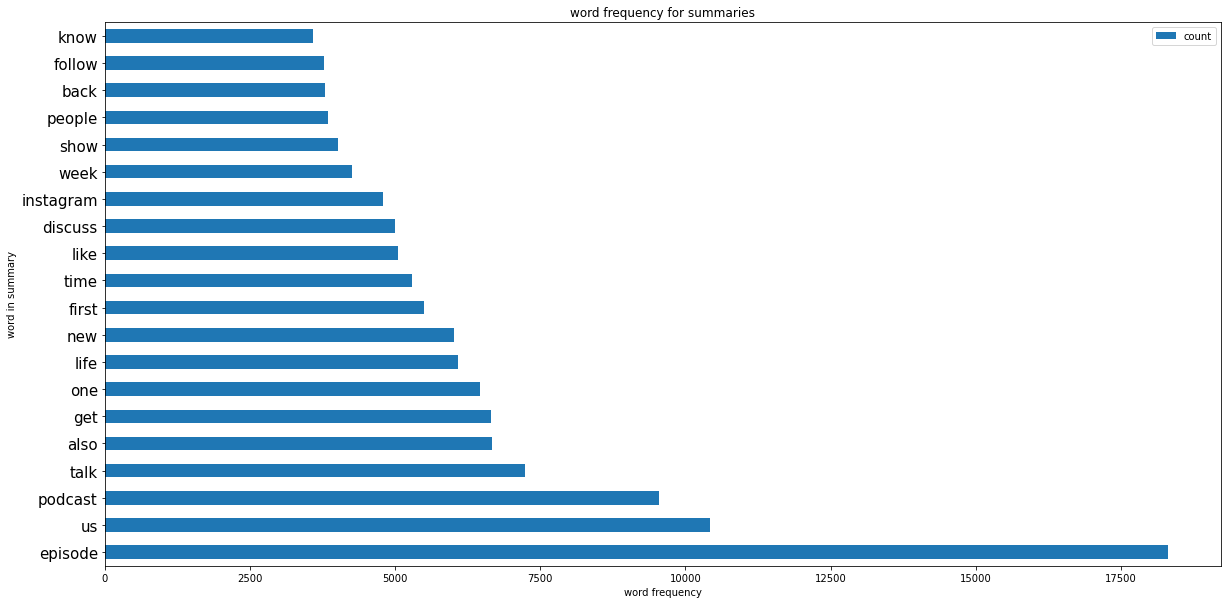

In [126]:
#plot the high frequency words in summaries
summary_word_frequency.head(20).set_index("word in summary").plot(kind="barh", rot=0, title="High frequency tokens in summaries",figsize=(20,10))
plt.xlabel('word frequency')
plt.xticks(size=10)
plt.yticks(size=15)
plt.title('word frequency for summaries')

From the diagram above, I know the most frequent words used in summaries are episode, us, podcast, talk.
Those are frequently used by the show creator to summarize each episode.

Now I can do the same thing for transcripts.

In [128]:
#initiate the tokenizer for transcripts
transcript_tokenizer = Tokenizer()

In [129]:
#fit to the transcripts
#Reminder: this cell cost a while!!!
transcript_tokenizer.fit_on_texts(transcript_no_stopwords)

In [130]:
#check the number of tokens for transcripts
transcript_index_word = transcript_tokenizer.index_word
print(f'The number of tokens for transcrips is {len(transcript_index_word)}.')

The number of tokens for summaries is 220521.


In [131]:
#check the word frequency in summaries
transcript_word_frequency = pd.DataFrame(data=transcript_tokenizer.word_counts.items(),columns=['word in transcript','count'])
transcript_word_frequency=transcript_word_frequency.sort_values('count',ascending=False)

Text(0.5, 1.0, 'word frequency for transcripts')

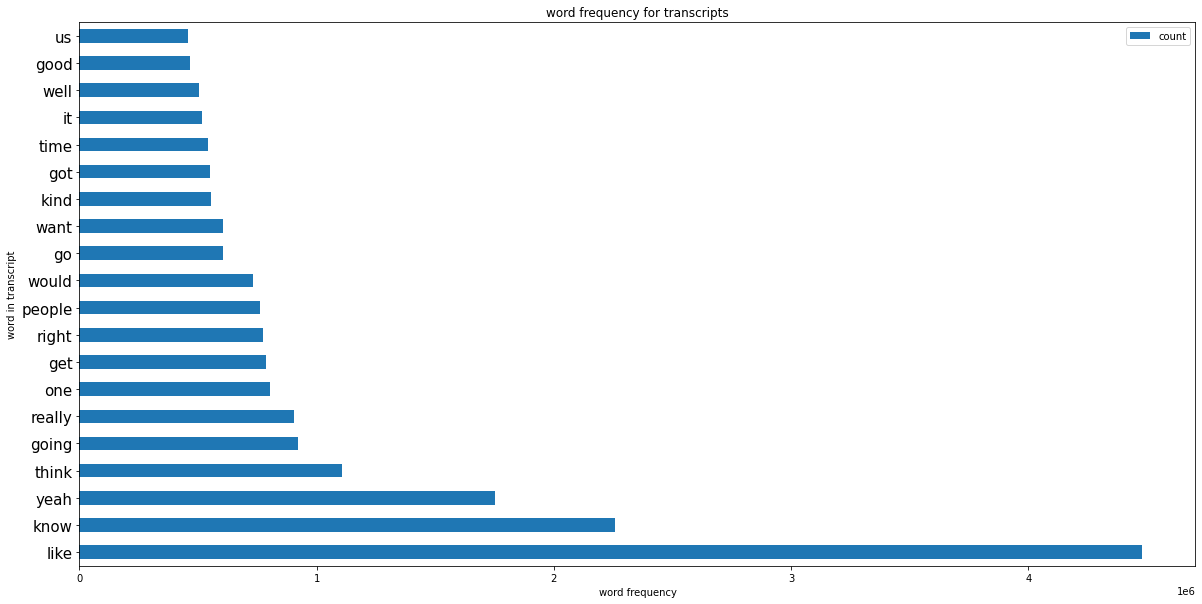

In [132]:
#plot the high frequency words in transcripts
transcript_word_frequency.head(20).set_index("word in transcript").plot(kind="barh", rot=0, title="High frequency tokens in transcripts",figsize=(20,10))
plt.xlabel('word frequency')
plt.xticks(size=10)
plt.yticks(size=15)
plt.title('word frequency for transcripts')

The most high frequency words for transcripts are like, know, yeah.

Among all, 'like' is most frequent at almost two times as frequent as 'know'.

Poscast is a vocal medium and 'like', 'know', 'yeah' are exactly the high frequency words we'd expect for people speaking in every day life.


## High frequency words and low frequency words


Any word that shows up less than 6 times, I define it as belonging to rare words.

In [141]:
#set threshold as 6
thresh = 6 

#set rare words number
rare = 0

#frequncy of rare words
rare_freq = 0 

#frequency of all words in summary

all_freq = 0

for key,value in summary_tokenizer.word_counts.items():
    all_freq += value
    if value <thresh:
        rare += 1
        rare_freq+=value
    
print(f'Percentage of rare words in summary vocabulary:{round(rare/len(summary_index_word)*100,2)}%')
print(f'Total Coverage of rare words for summary:{round(rare_freq/all_freq*100,2)}%')

Percentage of rare words in summary vocabulary:80.66%
Total Coverage of rare words for summary:8.02%


Now I know, words that show up less than 6 times take up 80% of the summary vocabulary.

Also, the rare words only contribute to 8% of all summaries.

In [142]:
#set threshold as 6
thresh = 6 

#set rare words number
rare = 0

#frequncy of rare words
rare_freq = 0 

#frequency of all words in summary

all_freq = 0

for key,value in transcript_tokenizer.word_counts.items():
    all_freq += value
    if value <thresh:
        rare += 1
        rare_freq+=value
    
print(f'Percentage of rare words in summary vocabulary:{round(rare/len(transcript_index_word)*100,2)}%')
print(f'Total Coverage of rare words for summary:{round(rare_freq/all_freq*100,2)}%')

Percentage of rare words in summary vocabulary:55.99%
Total Coverage of rare words for summary:0.23%


For transcripts, words that show up less than 6 times takes up 80% of transcripts' vocabulary.

Also, the rare words only contributes to 0.23% of all transcripts.

## Return from model building
More text cleanning for summaries

In [208]:
#basic copy from my summary cleaner
def transcript_cleaner_2(text):    
    text = re.sub(r'[*·•#\"]', ' ', text) #remove the * · • # "
    text = re.sub(r'\.\.+', ' ', text) #remove three points
    text = re.sub(r'\[[a-z]*\]', ' ', text) #remove [,] and the content inside it
    
#     #apply contraction map
    text = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in text.split(" ")])
    
    text = re.sub(r'[\sa-z0-9\s:]*https://[a-z0-9\s./-]*', ' ', text) # get rid of links and the information before the link
    text = re.sub(r'[\sa-z\:]*http://[a-z./-]*', ' ', text) #remove links and potential information before it
    text = re.sub(r'[0-9\sa-z:]*\.com[a-z0-9\s]*', ' ', text) # get rid of links and information beore the link
    text = re.sub(r'[0-9\sa-z:]*\.fm[a-z0-9\s]*', ' ', text) # get rid of links and information beore the link
    text = re.sub(r'[a-z0-9\s]@[a-z0-9\s]*', ' ', text) #get rid of sentence with @ and contact name
    text = re.sub(r'\s/[a-z0-9\-?=]*', ' ', text) #remove string like /smapler
    
    
    text = re.sub(r'[a-z0-9\s]*ig:[a-z0-9\s]*',' ', text)
    text = re.sub(r'[a-z0-9\s]*instagram:[a-z0-9\s]*',' ', text)
    text = re.sub(r'[a-z0-9\s]*twitter:[a-z0-9\s]*',' ', text)
    text = re.sub(r'[a-z0-9\s]*email:[a-z0-9\s]*',' ', text)
    text = re.sub(r'[a-z0-9\s]*plase\sclick[a-z0-9\s]*',' ', text)
    text = re.sub(r'[a-z0-9\s]*click\shere[a-z0-9\s]*',' ', text)
    text = re.sub(r'[a-z0-9\s]*click\sthe\slink[a-z0-9\s]*',' ', text)
    text = re.sub(r'[a-z0-9\s]*sponsor[a-z0-9\s]*',' ', text) #remove sentence with 'sponsor','please click','click here','ig:','email:'
    text = re.sub(r'[a-z0-9\s]*anchor:[a-z0-9\s]*', ' ',text) #get rid of anchor information
    text = re.sub(r'[a-z0-9\s]*support this podcst:[a-z0-9\s]*', '',text) #get rid of anchor information
    text = re.sub(r'[a-z0-9\s]*support our podcst:[a-z0-9\s]*', '',text) #get rid of anchor information
 

    text = re.sub(r'\s[.!?,]\s','',text) # get rid of single dot,question mark,and exclamation mark
    
    text = re.sub(r'\s\s+', ' ', text) # get rid more than one space
    text = text.strip() #get rid of the space in the end of sentences.
    return text

In [175]:
train=joblib.load('train.pkl')

In [176]:
#check the shape
train.shape

(32354, 2)

In [209]:
train['transcript'] = train['transcript'].apply(transcript_cleaner_2)

I need to mention here, it is pretty hard to remove all the sponsor information. I believe there are still a lot commercial sentences I didn't remove.

There is a paper[2] written by Reddy and Sravana.
They trained a model that could detect extraneous content in Podcasts.

I didn't find the model online.

If I have more time, I will reach out to the authors to ask for code, and rerun my models again.


In [210]:
joblib.dump(train,'second_clean_train.pkl')

['second_clean_train.pkl']

## Conclusion

I have combined the cleaned metadata and transcripts into a dataframe with two coloumns.
One column is summary, another column is transcript.

After removing all stop words, I find the most frequent word for summaries is 'episode', and the most frequent word for transcripts is 'like'.

The number of word tokens of summaries is 95,932. 
However, 80% of them show up less than 6 times, and contributes to 8% of summaries.

Number of word tokens of transcripts is 220521.
55% of them shows up less than 6 times, and contributes to 0.23% of all transcripts.

The rare words make up more than half of the token numbers, but compose less than 10% of text.

Reference

[1]Comprehensive Guide to Text Summarization using Deep Learning in Python,aravindpai,June 10, 2019
https://www.analyticsvidhya.com/blog/2019/06/comprehensive-guide-text-summarization-using-deep-learning-python/
[2][Detecting Extraneous Content in Podcasts](https://aclanthology.org/2021.eacl-main.99) (Reddy et al., EACL 2021)